In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
dataset = pd.read_csv('/home/haika/Documents/shahram/ds/projects/australia_car_accidnet/Crash_Data.csv')

In [4]:
dataset.head(5)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non-null  object
 13  A

In [11]:
dataset.shape

(52843, 23)

In [5]:
dataset.isnull().sum()

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                40
Crash Type                           0
Bus Involvement                     22
Heavy Rigid Truck Involvement    20515
Articulated Truck Involvement       22
Speed Limit                        702
Road User                            0
Gender                              27
Age                                  0
National Remoteness Areas        45965
SA4 Name 2016                    45951
National LGA Name 2017           45950
National Road Type               45966
Christmas Period                     0
Easter Period                        0
Age Group                           90
Day of week                          0
Time of day                          0
dtype: int64

In [6]:
#how much percent of each column is missing value?
dataset.isnull().sum() * 100 / len(dataset)

Crash ID                          0.000000
State                             0.000000
Month                             0.000000
Year                              0.000000
Dayweek                           0.000000
Time                              0.075696
Crash Type                        0.000000
Bus Involvement                   0.041633
Heavy Rigid Truck Involvement    38.822550
Articulated Truck Involvement     0.041633
Speed Limit                       1.328464
Road User                         0.000000
Gender                            0.051095
Age                               0.000000
National Remoteness Areas        86.984085
SA4 Name 2016                    86.957591
National LGA Name 2017           86.955699
National Road Type               86.985977
Christmas Period                  0.000000
Easter Period                     0.000000
Age Group                         0.170316
Day of week                       0.000000
Time of day                       0.000000
dtype: floa

In [ ]:
#As you can see we have missing values in some columns
#First we will fill missing values in columns where filling it with the majority of its class is an appropriate approach
#For example the majority class of the column'Bus Involvement' is No so we fill those 22 missing values with No

In [5]:
dataset['Bus Involvement'].value_counts()

No     51835
Yes      986
Name: Bus Involvement, dtype: int64

In [4]:
dataset['Bus Involvement'] = dataset['Bus Involvement'].fillna('No')
dataset['Heavy Rigid Truck Involvement'] = dataset['Heavy Rigid Truck Involvement'].fillna('No')
dataset['Articulated Truck Involvement'] = dataset['Articulated Truck Involvement'].fillna('No')
dataset['Gender'] = dataset['Gender'].fillna('Male')
dataset['Age Group'] = dataset['Age Group'].fillna('17_to_25')
# The speed limit column has two rows namely  'Unspecified' and '<40' so we replace these values with value 35
dataset.loc[dataset['Speed Limit']== '<40', 'Speed Limit'] = 35
dataset.loc[dataset['Speed Limit']== 'Unspecified' , 'Speed Limit'] = 35
#some entries of speed limit are string. we convert them to int and then fill null values with its mean
dataset['Speed Limit'] = dataset['Speed Limit'].astype('float')
dataset['Speed Limit'] = dataset['Speed Limit'].replace(np.NaN,dataset['Speed Limit'].mean())

In [8]:
#The result of above code
dataset.isnull().sum()

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                40
Crash Type                           0
Bus Involvement                      0
Heavy Rigid Truck Involvement        0
Articulated Truck Involvement        0
Speed Limit                          0
Road User                            0
Gender                               0
Age                                  0
National Remoteness Areas        45965
SA4 Name 2016                    45951
National LGA Name 2017           45950
National Road Type               45966
Christmas Period                     0
Easter Period                        0
Age Group                            0
Day of week                          0
Time of day                          0
dtype: int64

In [6]:
# There are too many missing values in the following columns:
#'National Remoteness Areas, 'SA4 Name 2016', 'National LGA Name 2017', 'National Road Type' 
    
#we will fill these missing values with the word 'unavailable'
dataset['National Remoteness Areas'] = dataset['National Remoteness Areas'].fillna('unknown')
dataset['SA4 Name 2016'] = dataset['SA4 Name 2016'].fillna('unknown')
dataset['National LGA Name 2017'] = dataset['National LGA Name 2017'].fillna('unknown')
dataset['National Road Type'] = dataset['National Road Type'].fillna('unknown')
dataset['Time'] = dataset['Time'].fillna('15:00')

In [23]:
#The result of above code
dataset.isnull().sum()

Crash ID                         0
State                            0
Month                            0
Year                             0
Dayweek                          0
Time                             0
Crash Type                       0
Bus Involvement                  0
Heavy Rigid Truck Involvement    0
Articulated Truck Involvement    0
Speed Limit                      0
Road User                        0
Gender                           0
Age                              0
National Remoteness Areas        0
SA4 Name 2016                    0
National LGA Name 2017           0
National Road Type               0
Christmas Period                 0
Easter Period                    0
Age Group                        0
Day of week                      0
Time of day                      0
dtype: int64

<AxesSubplot:xlabel='Crash Type', ylabel='count'>

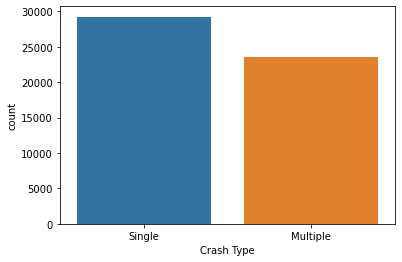

In [11]:
sns.countplot(data=dataset, x='Crash Type')

AttributeError: 'Figure' object has no attribute 'ylabel'

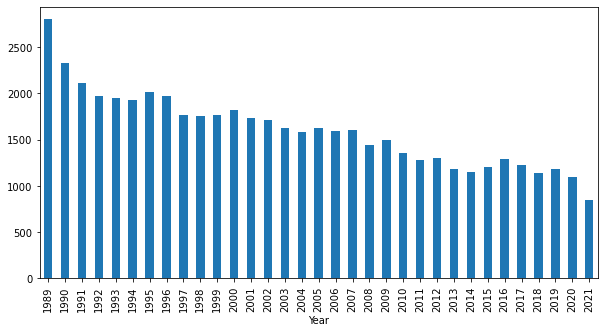

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
dataset.groupby('Year')['Crash ID'].count().plot.bar()
plt.ylabel('Number of Death')
plt.show()

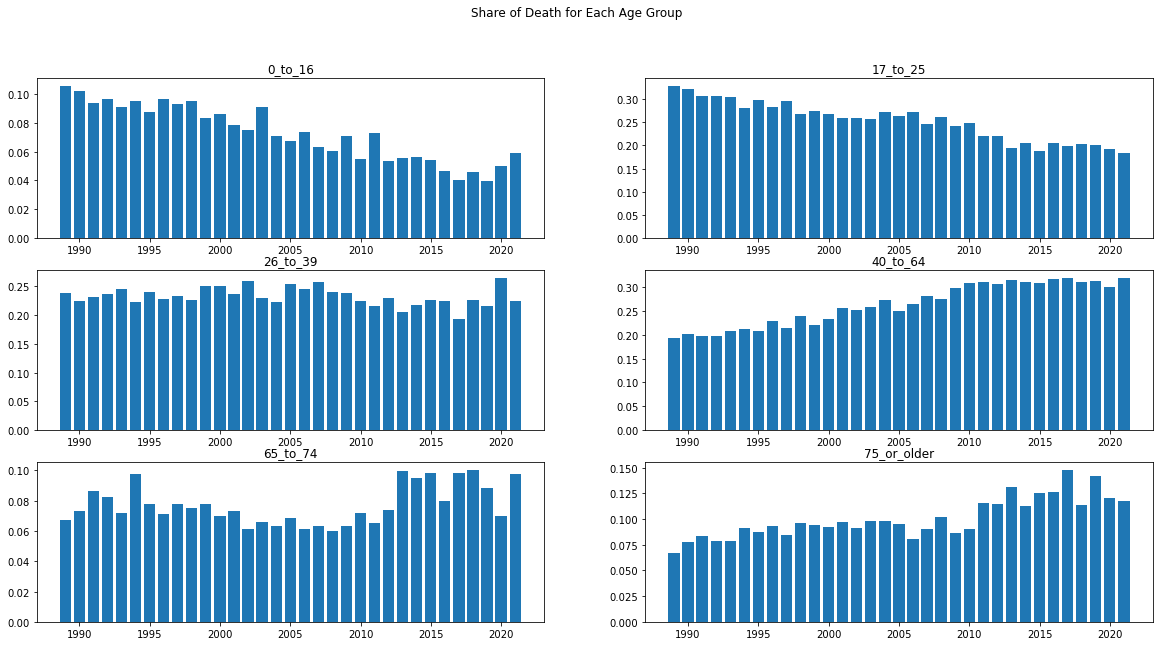

In [12]:
#age_groups = df['Age Group'].value_counts().sort_index().index.tolist()
#dataset.groupby(dataset['Age Group'])['Crash ID'].count().plot.bar()
#plt.show()
age_groups = dataset['Age Group'].value_counts().sort_index().index.tolist()
i=0
fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Share of Death for Each Age Group')
for group in age_groups:
    i=i+1
    ax = plt.subplot(320+i)
    plots = dataset[dataset['Age Group'] == group].groupby('Year')['Crash ID'].count() / dataset.groupby('Year')['Crash ID'].count()
    plt.title(group)
    plt.bar(plots.index, plots.values)
plt.show()    


In [ ]:
#if you look at above figures we

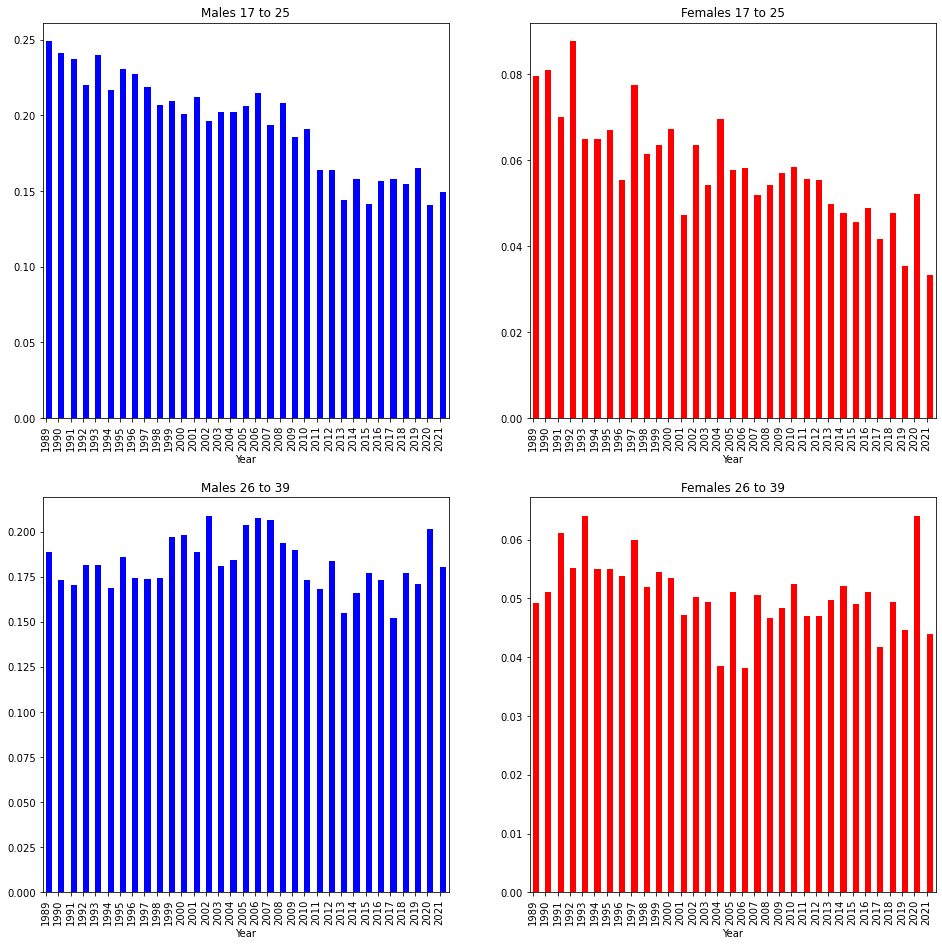

In [20]:
fig, ax = plt.subplots(figsize=(16,16))
fig.suptitle('Share of Death Shown in Age Groups, Gender, Year')
ax= plt.subplot(221)
male_plot = dataset[(dataset['Gender']== 'Male') & (dataset['Age Group'] == '17_to_25')].groupby('Year')['Crash ID'].count() / dataset.groupby('Year')['Crash ID'].count()
male_plot.plot.bar( align='edge', color='b', title='Males 17 to 25')
ax = plt.subplot(222)
female_plot = dataset[(dataset['Gender']== 'Female') & (dataset['Age Group'] == '17_to_25')].groupby('Year')['Crash ID'].count() / dataset.groupby('Year')['Crash ID'].count()
female_plot.plot.bar( align='edge', color='r', title='Females 17 to 25')
ax= plt.subplot(223)
male_plot = dataset[(dataset['Gender']== 'Male') & (dataset['Age Group'] == '26_to_39')].groupby('Year')['Crash ID'].count() / dataset.groupby('Year')['Crash ID'].count()
male_plot.plot.bar( align='edge', color='b', title='Males 26 to 39')
ax = plt.subplot(224)
female_plot = dataset[(dataset['Gender']== 'Female') & (dataset['Age Group'] == '26_to_39')].groupby('Year')['Crash ID'].count() / dataset.groupby('Year')['Crash ID'].count()
female_plot.plot.bar( align='edge', color='r', title='Females 26 to 39')
plt.show()

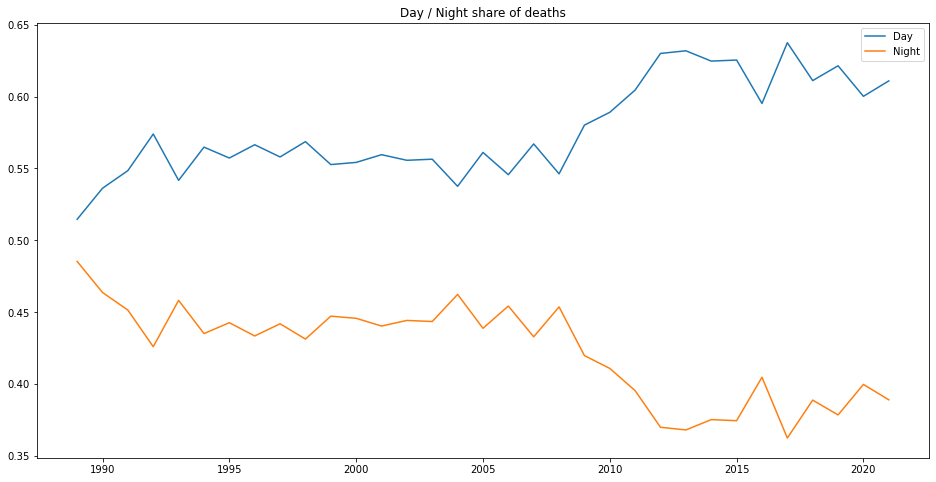

In [26]:
time_groups = dataset['Time of day'].value_counts().sort_index().index.tolist()
fig, ax = plt.subplots(figsize=(16,8))
i=0
for group in time_groups:
    i = i+1
    for_groups = dataset[dataset['Time of day']==group].groupby('Year')['Crash ID'].count() /  dataset.groupby('Year')['Crash ID'].count()
    plt.plot(for_groups.index, for_groups.values, label=group)
    plt.title('Day / Night share of deaths')
    plt.legend()
    
plt.show()

In [39]:
print(dataset['Time'].apply(type))

0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
52838    <class 'str'>
52839    <class 'str'>
52840    <class 'str'>
52841    <class 'str'>
52842    <class 'str'>
Name: Time, Length: 52843, dtype: object


In [101]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
#import numpy as np
#dataset['Bus Involvement'] = dataset['Bus Involvement'].apply(lambda x: x.fillna(b)[0])